## EDA on Cleaned Data

#### Imports

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime as dt
import numpy as np

In [2]:
test_clean = pd.read_csv('../data/test_clean.csv')
train_clean = pd.read_csv('../data/train_clean.csv')
weather_clean = pd.read_csv('../data/weather_Clean.csv')

In [3]:
train_clean.columns

Index(['date', 'address', 'species', 'block', 'street', 'trap',
       'addressnumberandstreet', 'latitude', 'longitude', 'addressaccuracy',
       'nummosquitos', 'wnvpresent', 'year', 'month', 'week', 'weekday'],
      dtype='object')

In [4]:
test_clean.columns

Index(['date', 'address', 'species', 'block', 'street', 'trap',
       'addressnumberandstreet', 'latitude', 'longitude', 'addressaccuracy',
       'year', 'month', 'week', 'weekday'],
      dtype='object')

In [5]:
weather_clean.columns

Index(['station', 'date', 'tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb',
       'heat', 'cool', 'sunrise', 'sunset', 'codesum', 'preciptotal',
       'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed',
       'year', 'month', 'weekday'],
      dtype='object')

In [6]:
#function to convert coordinates to radians before calculating distance between 2 coordinates
def get_distance(lat1, lon1, lat2, lon2):
    R = 6373.0
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    temp = (
         math.sin(dlat / 2) ** 2
       + math.cos(lat1)
       * math.cos(lat2)
       * math.sin(dlon / 2) ** 2
    )
    C = (2 * math.atan2(math.sqrt(temp), math.sqrt(1 - temp)))
    distance = R * C
    return distance
#function to calculate nearest station from trap according to distance
def nearest_station(trap_lat, trap_lon):
    station1_lat = 41.995
    station1_lon = -87.933
    station2_lat = 41.786
    station2_lon = -87.752
    #calculates trap distance with station 1 / 2
    dist_station1 = get_distance(station1_lat,station1_lon,trap_lat,trap_lon)
    dist_station2 = get_distance(station2_lat,station2_lon,trap_lat,trap_lon)
    #comparing distances
    if dist_station1 > dist_station2:
        return 2
    else:
        return 1

In [7]:
train_clean['station'] = train_clean.apply(lambda x: nearest_station(x.latitude,x.longitude), axis = 1)
test_clean['station'] = test_clean.apply(lambda x: nearest_station(x.latitude,x.longitude), axis = 1)
train_clean['date'] = pd.to_datetime(train_clean['date'])
test_clean['date'] = pd.to_datetime(test_clean['date'])

weather_clean['date'] = pd.to_datetime(weather_clean['date'])
train_no_spec_dup = train_clean.drop_duplicates(subset=['date', 'address', 'block', 'street', 'trap',
       'addressnumberandstreet', 'latitude', 'longitude', 'addressaccuracy',
       'nummosquitos', 'wnvpresent', 'year', 'month', 'week', 'weekday'])
weather_train_df = pd.merge(train_clean, weather_clean, on =['date', 'station', 'year', 'month', 'weekday'])

In [8]:
# sanity check to ensure merge is successful
weather_train_df.shape

(9693, 33)

Based on our exploration of data

In [9]:
train_cols = [ col for col in train_clean.columns if col != 'species']

In [10]:
train_clean[train_clean.duplicated(subset=train_cols)]

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent,year,month,week,weekday,station
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007,5,22,2,1
14,2007-05-29,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,1,0,2007,5,22,2,2
32,2007-06-05,"1500 West Webster Avenue, Chicago, IL 60614, USA",CULEX PIPIENS,15,W WEBSTER AVE,T045,"1500 W WEBSTER AVE, Chicago, IL",41.921600,-87.666455,8,1,0,2007,6,23,2,2
35,2007-06-05,"1100 Roosevelt Road, Chicago, IL 60608, USA",CULEX RESTUANS,11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,1,0,2007,6,23,2,2
39,2007-06-05,"2100 North Stave Street, Chicago, IL 60647, USA",CULEX RESTUANS,21,N STAVE ST,T050,"2100 N STAVE ST, Chicago, IL",41.919343,-87.694259,8,1,0,2007,6,23,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9589,2013-09-19,"West Garfield Boulevard, Chicago, IL, USA",CULEX RESTUANS,90,W GARFIELD BLVD,T226,"9000 W GARFIELD BLVD, Chicago, IL",41.793818,-87.654234,5,2,0,2013,9,38,4,2
9645,2013-09-26,"5000 South Union Avenue, Chicago, IL 60609, USA",CULEX RESTUANS,50,S UNION AVE,T082,"5000 S UNION AVE, Chicago, IL",41.803423,-87.642984,8,2,0,2013,9,39,4,2
9648,2013-09-26,"5200 South Kolmar Avenue, Chicago, IL 60632, USA",CULEX PIPIENS,52,S KOLMAR,T114,"5200 S KOLMAR, Chicago, IL",41.798697,-87.736812,8,2,0,2013,9,39,4,2
9665,2013-09-26,"South Cottage Grove Avenue, Chicago, IL, USA",CULEX PIPIENS,10,S COTTAGE GROVE,T102,"1000 S COTTAGE GROVE, Chicago, IL",41.750498,-87.605294,5,1,0,2013,9,39,4,2


From the above, it seems that we have some duplicated rows if we disregard the species column. This seems to suggest that for every sample collected, if more than 1 species of mosquito was found, it would be recorded as a separate row. In order for us to check how many samples were collected, we will drop these duplicate rows, effectively ensuring that a **single sample collection is counted only once.** 

In [11]:
single_samples = train_clean.drop_duplicates(subset=train_cols)

In [12]:
single_samples.shape

(8994, 17)

Since we have a date column, our data might be a times series, lets check if we have all the dates in chronological order.

In [13]:
single_samples.columns

Index(['date', 'address', 'species', 'block', 'street', 'trap',
       'addressnumberandstreet', 'latitude', 'longitude', 'addressaccuracy',
       'nummosquitos', 'wnvpresent', 'year', 'month', 'week', 'weekday',
       'station'],
      dtype='object')

In [14]:
pd.set_option('display.max_columns', None)
weather_train_df.head()

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent,year,month,week,weekday,station,tmax,tmin,tavg,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007,5,22,2,1,88,60,74.0,58,65.0,0.0,9.0,04:21:00,19:17:00,"['BR', 'HZ']",0.0,29.39,30.11,5.8,18,6.5
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,2007,5,22,2,1,88,60,74.0,58,65.0,0.0,9.0,04:21:00,19:17:00,"['BR', 'HZ']",0.0,29.39,30.11,5.8,18,6.5
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,2007,5,22,2,1,88,60,74.0,58,65.0,0.0,9.0,04:21:00,19:17:00,"['BR', 'HZ']",0.0,29.39,30.11,5.8,18,6.5
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,2007,5,22,2,1,88,60,74.0,58,65.0,0.0,9.0,04:21:00,19:17:00,"['BR', 'HZ']",0.0,29.39,30.11,5.8,18,6.5
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,2007,5,22,2,1,88,60,74.0,58,65.0,0.0,9.0,04:21:00,19:17:00,"['BR', 'HZ']",0.0,29.39,30.11,5.8,18,6.5


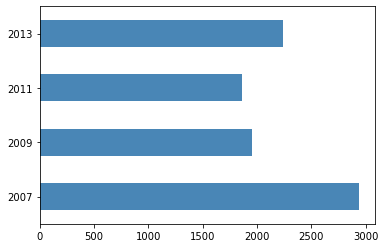

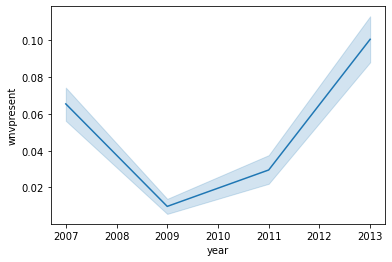

In [15]:
plt.figure()
single_samples['year'].value_counts().sort_index().plot(kind='barh', color='#4986B6');
plt.figure()
sns.lineplot(data=single_samples, x='year', y='wnvpresent');

From the above figure, we can see that the number of samples collected each year has reduced, with an increase in 2013. Most likely this was due to the fact that the occurence of the West Nile Virus in 2009 reduced, prompting a reduced sample collection rate in 2011, however that must have contributed to the increase of the occurence in 2011, and the highest recorded occurence in 2013.

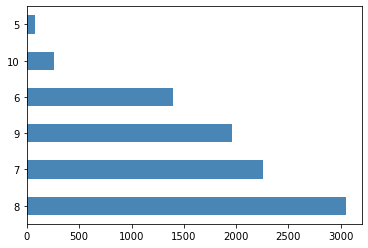

In [16]:
single_samples['month'].value_counts().plot(kind='barh', color='#4986B6');

In [1]:
single_samples['week'].value_counts().plot(kind='barh', color='#4986B6');

NameError: name 'single_samples' is not defined

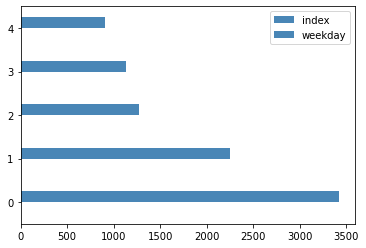

In [18]:
single_samples['weekday'].value_counts().reset_index().plot(kind='barh', color='#4986B6');

So the weird thing about this dataframe is, although it could be a timeseries, we have incomplete data. Some dates are just missing, we do not have a sequence of dates in chronological order, we have a few of the months, a few of the weeks, and a few of the years. (Daren has covered this extensively in his EDA).

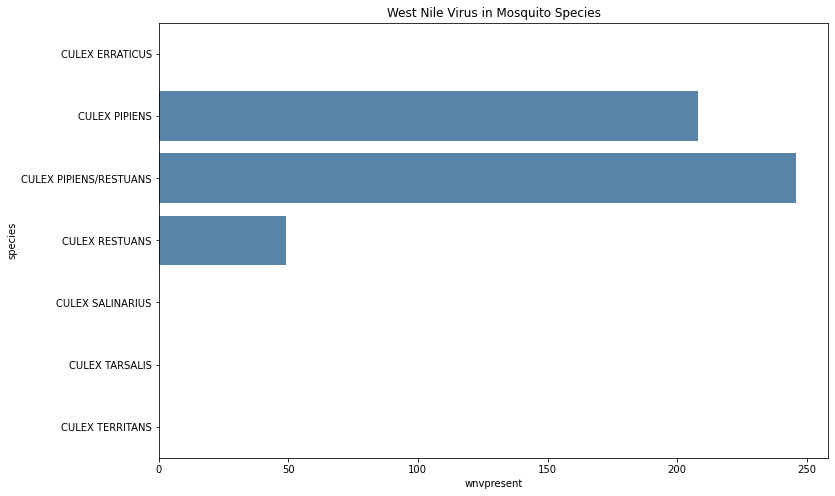

In [19]:
plt.figure(figsize=(12,8))
moz_wnv = weather_train_df[['species', 'nummosquitos', 'wnvpresent']].groupby(by='species').sum().reset_index()
sns.barplot(data=moz_wnv, x='wnvpresent', y='species', color='#4986B6', orient='h')
plt.title('West Nile Virus in Mosquito Species');

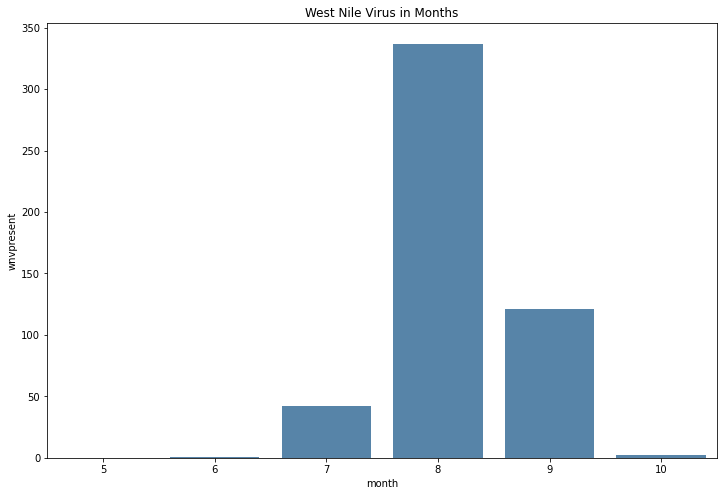

In [20]:
plt.figure(figsize=(12,8))
month_groupby = weather_train_df.groupby(by='month').sum().reset_index()
sns.barplot(data=month_groupby, x='month', y='wnvpresent', color='#4986B6')
plt.title('West Nile Virus in Months');

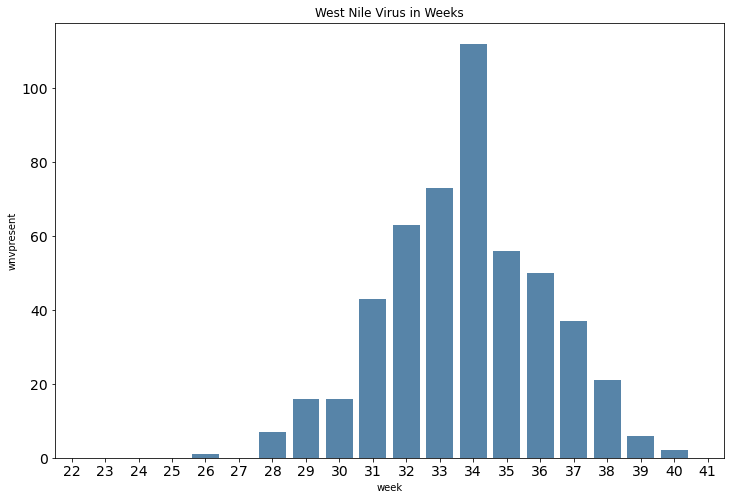

In [21]:
plt.figure(figsize=(12,8))
week_groupby = weather_train_df.groupby(by='week').sum().reset_index()
sns.barplot(data=week_groupby, x='week', y='wnvpresent', color='#4986B6')
plt.tick_params(labelsize=14)
plt.title('West Nile Virus in Weeks');

Overall Frequency of WNV.

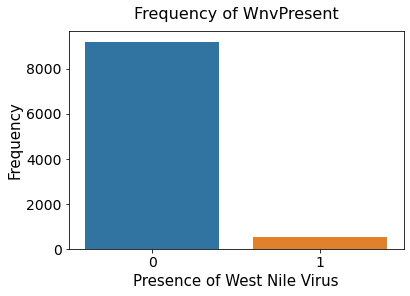

In [22]:
sns.barplot(x=[0,1], y=weather_train_df['wnvpresent'].value_counts())
plt.xlabel('Presence of West Nile Virus', fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.tick_params(labelsize=14)
plt.title('Frequency of WnvPresent',fontsize=16, y=1.03)
plt.show()

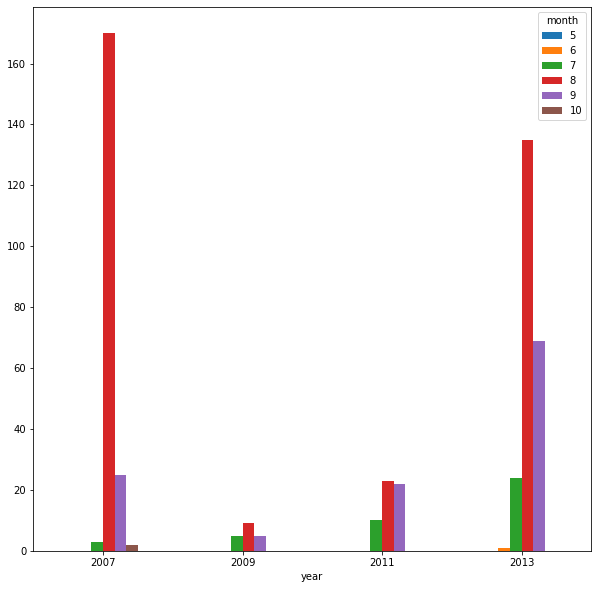

In [25]:
weather_train_df.groupby(['year','month'])['wnvpresent'].sum().unstack().plot.bar(figsize=(10,10))
plt.xticks(rotation=0);

Let's see what effect some of the features have on the occurence of WNV.

<Figure size 720x720 with 0 Axes>

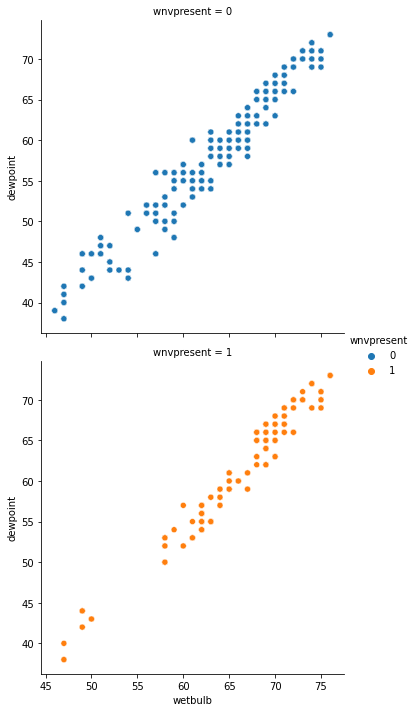

In [27]:
plt.figure(figsize=(10,10))
sns.relplot(data=weather_train_df, x='wetbulb', y='dewpoint', row='wnvpresent', hue='wnvpresent');

WHY DOESN'T THE ABOVE WORK WITH SCATTER PLOT???

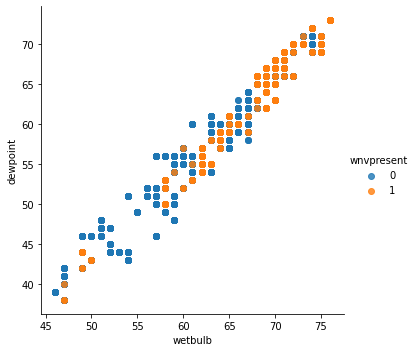

In [28]:
sns.lmplot(data=weather_train_df, x='wetbulb', y='dewpoint', hue='wnvpresent', fit_reg=False);

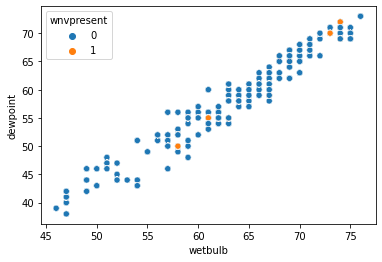

In [121]:
sns.scatterplot(data=weather_train_df, x='wetbulb', y='dewpoint', hue='wnvpresent');

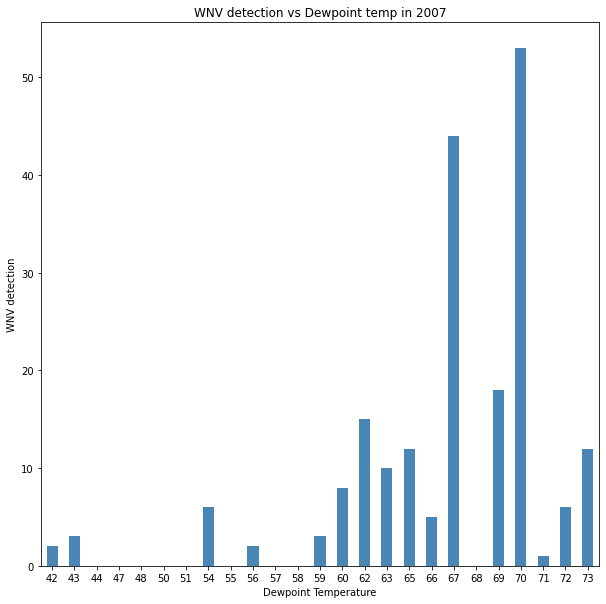

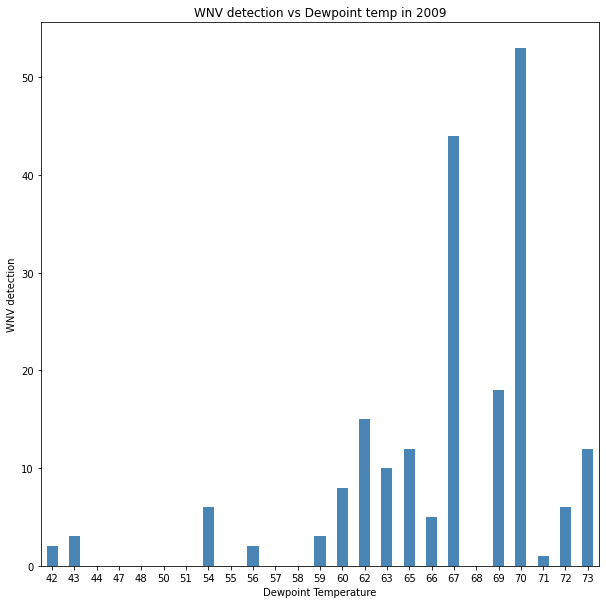

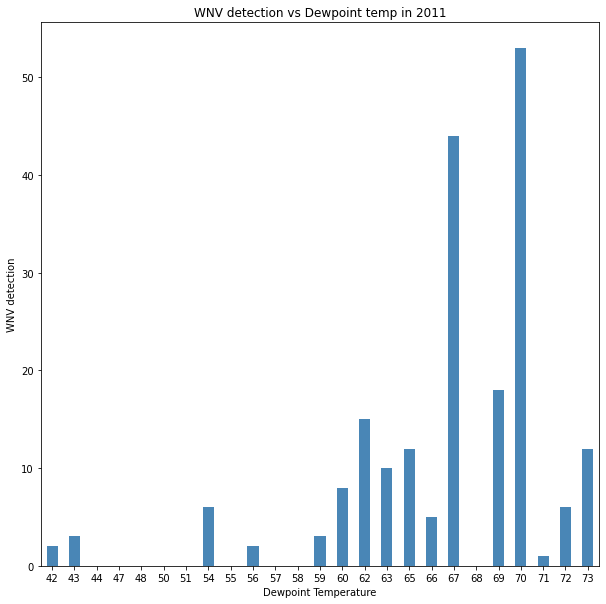

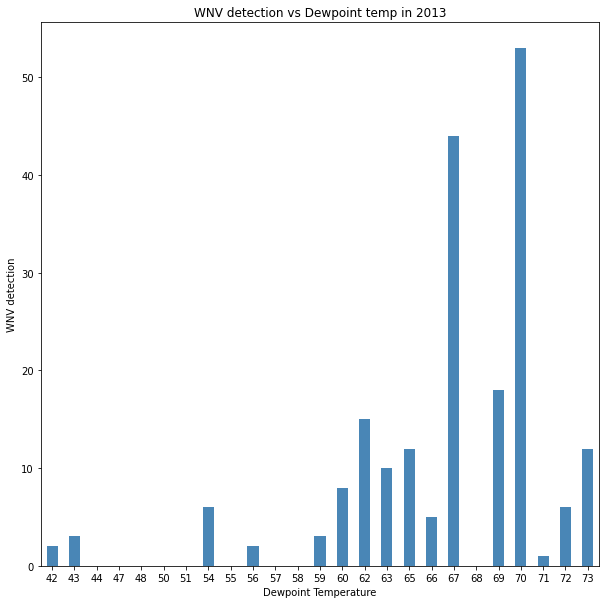

In [44]:
for yr in [2007, 2009, 2011, 2013]:
    plt.figure(figsize=(10,10))
    weather_train_df[weather_train_df['year'] == 2007].groupby('dewpoint')['wnvpresent'].sum().plot.bar(color='#4986B6')
    plt.xticks(rotation=0)
    plt.title(f'WNV detection vs Dewpoint temp in {yr}')
    plt.ylabel('WNV detection')
    plt.xlabel('Dewpoint Temperature');

For each year we can see that we mostly see the same trend of higher dewpoint temperatures resulting in a higher detection of the WNV. Let's repeat this with wetbulb temperatures.

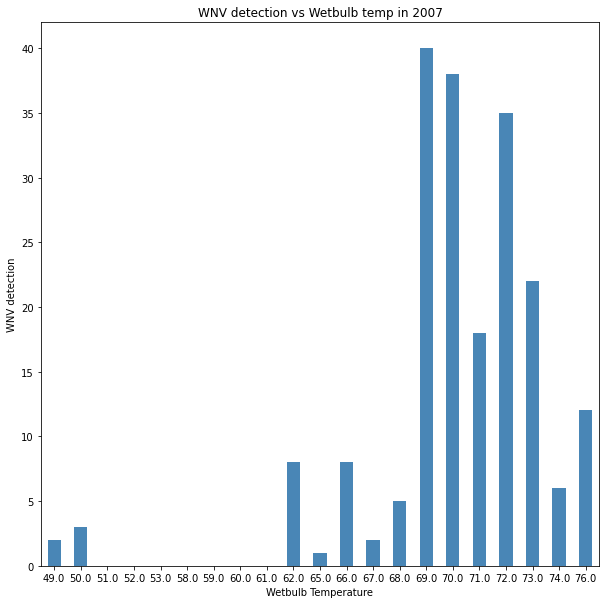

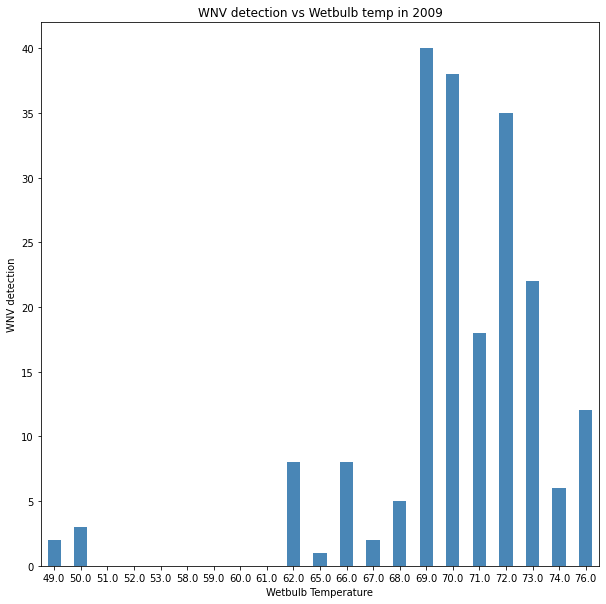

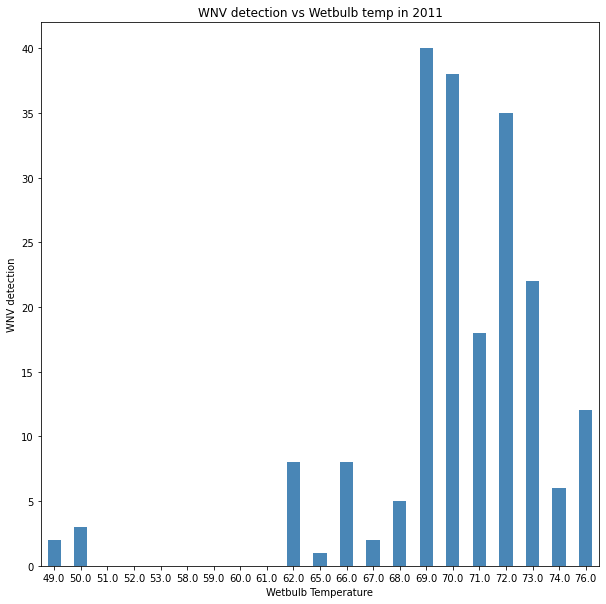

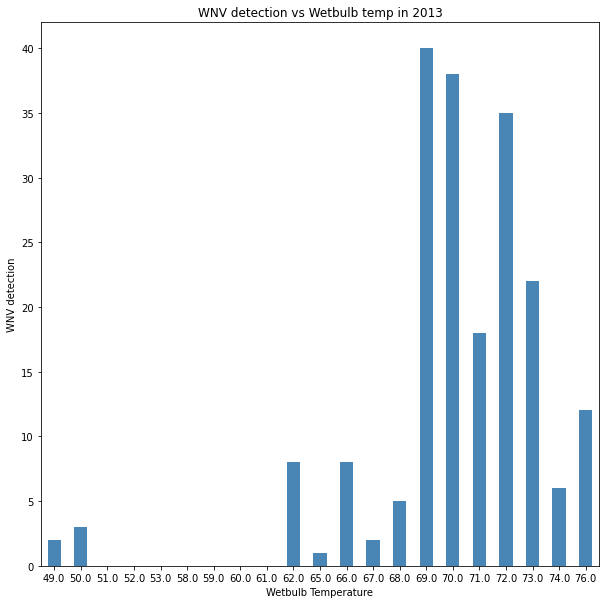

In [45]:
for yr in [2007, 2009, 2011, 2013]:
    plt.figure(figsize=(10,10))
    weather_train_df[weather_train_df['year'] == 2007].groupby('wetbulb')['wnvpresent'].sum().plot.bar(color='#4986B6')
    plt.xticks(rotation=0)
    plt.title(f'WNV detection vs Wetbulb temp in {yr}')
    plt.ylabel('WNV detection')
    plt.xlabel('Wetbulb Temperature');

In summary, we see a confirmation of the trend we first saw when we looked at the occurence of WNV with respect to both Dewpoint temperature and Wetbulb temperature. As humidity and heat increases, we see a higher occurence of the virus. This is as expected as mosquitos require higher temperature and humidity in order to breed.<br>

Range of WNV detection:
* Dewpoint Temperature: 54 - 73 degrees Farenheit
* Wetbulb Temperature: 62 - 76 degrees Farenheit

Now let's repeat this process with the `tmin` and `tmax` features.

<Figure size 720x720 with 0 Axes>

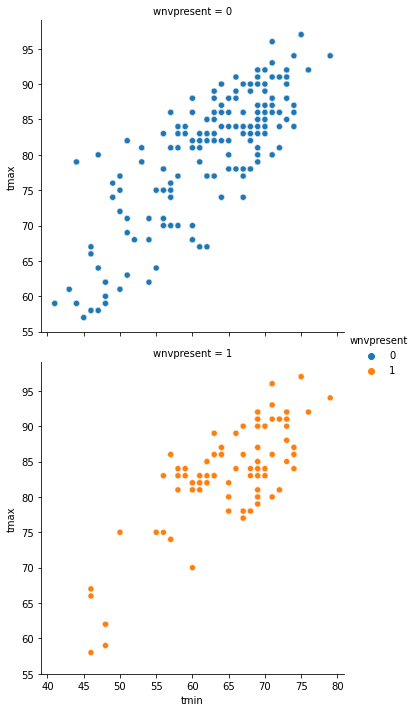

In [47]:
plt.figure(figsize=(10,10));
sns.relplot(data=weather_train_df, x='tmin', y='tmax', row='wnvpresent', hue='wnvpresent');

WHY DOESN'T THE ABOVE WORK WITH SCATTER PLOT???

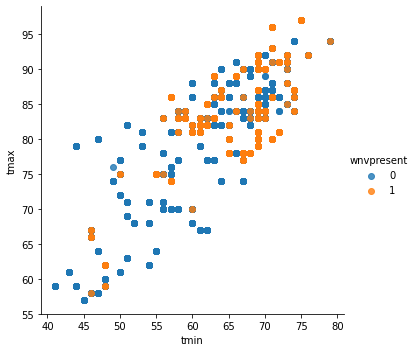

In [48]:
sns.lmplot(data=weather_train_df, x='tmin', y='tmax', hue='wnvpresent', fit_reg=False);

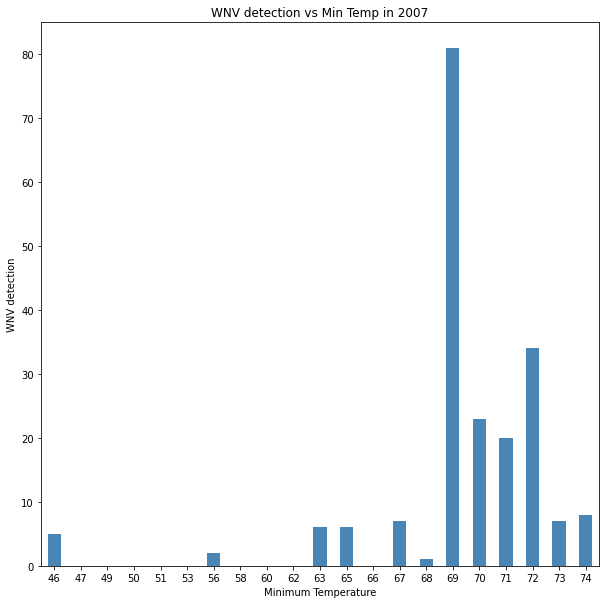

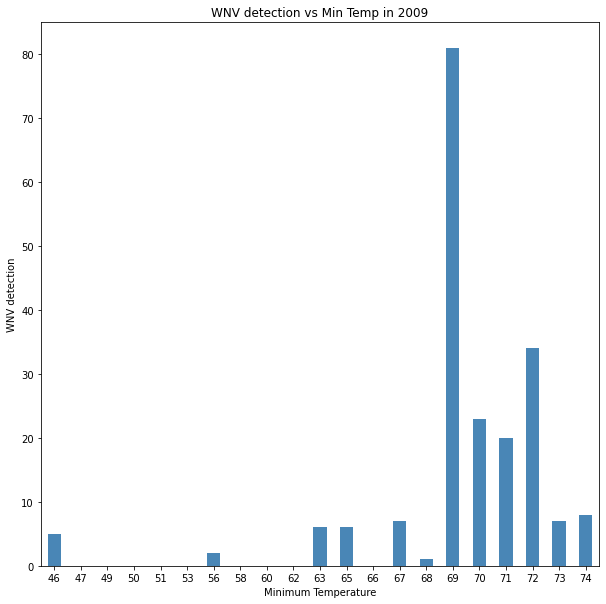

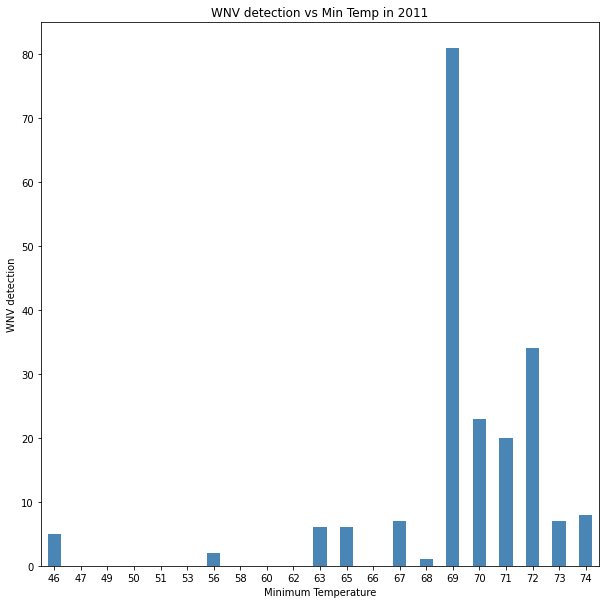

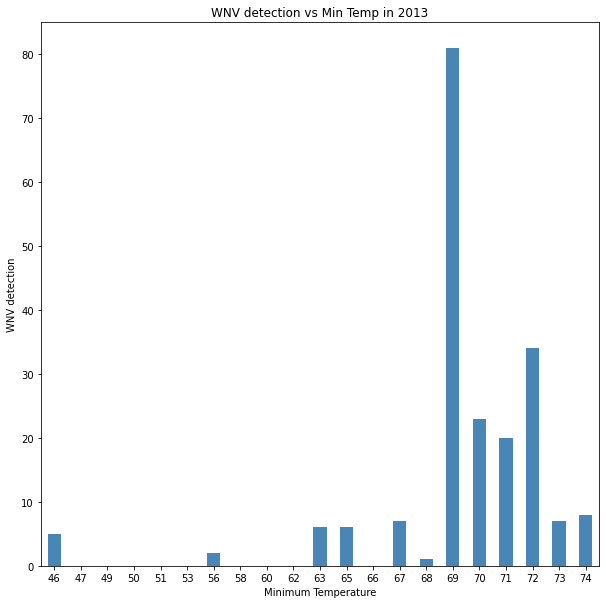

In [49]:
for yr in [2007, 2009, 2011, 2013]:
    plt.figure(figsize=(10,10))
    weather_train_df[weather_train_df['year'] == 2007].groupby('tmin')['wnvpresent'].sum().plot.bar(color='#4986B6')
    plt.xticks(rotation=0)
    plt.title(f'WNV detection vs Min Temp in {yr}')
    plt.ylabel('WNV detection')
    plt.xlabel('Minimum Temperature');

For each year we can see that we mostly see the same trend of higher dewpoint temperatures resulting in a higher detection of the WNV. Let's repeat this with wetbulb temperatures.

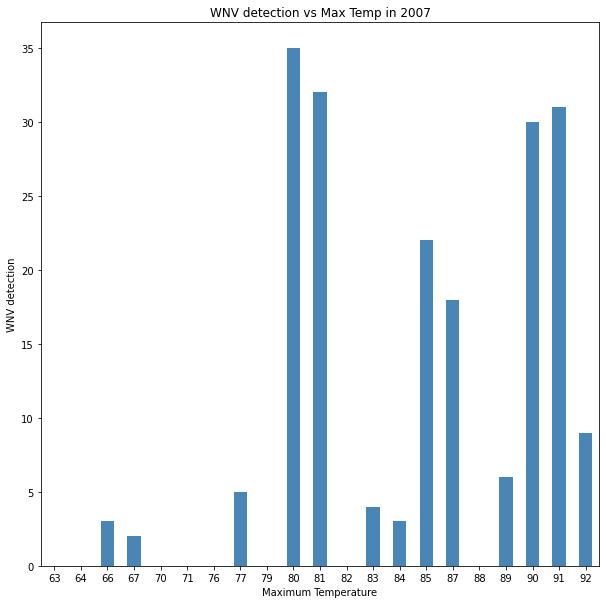

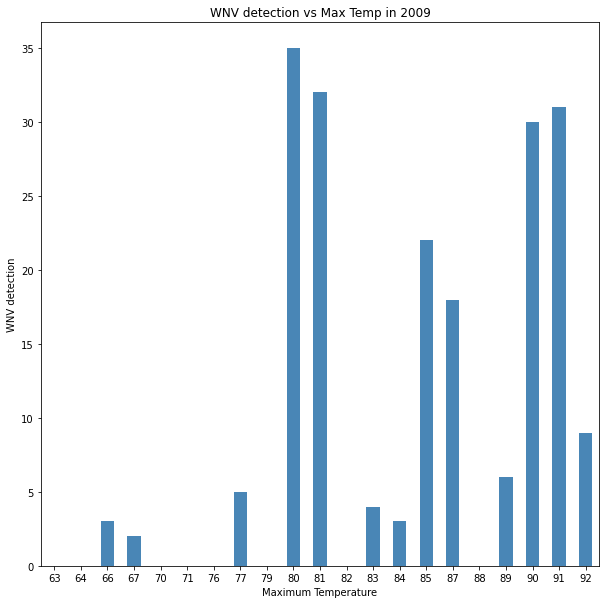

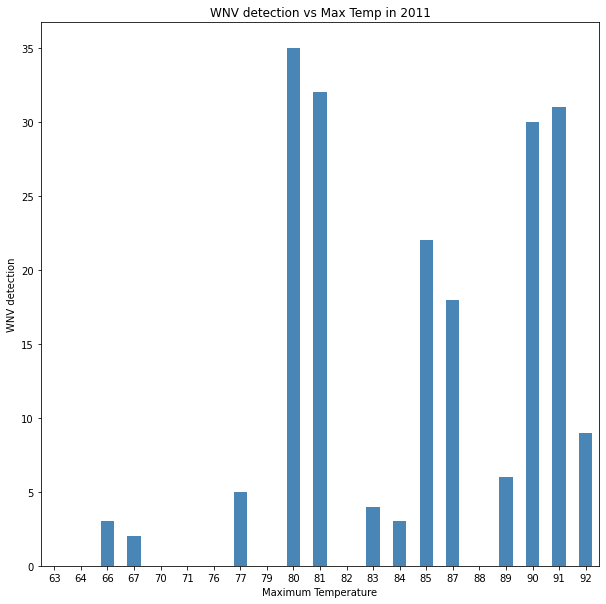

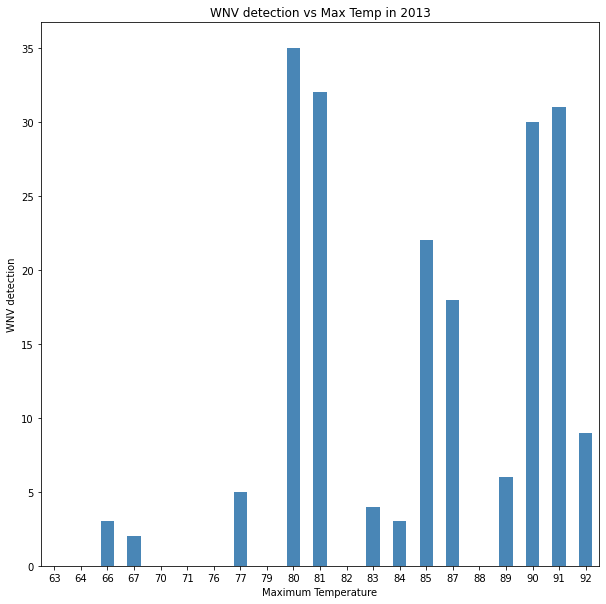

In [50]:
for yr in [2007, 2009, 2011, 2013]:
    plt.figure(figsize=(10,10))
    weather_train_df[weather_train_df['year'] == 2007].groupby('tmax')['wnvpresent'].sum().plot.bar(color='#4986B6')
    plt.xticks(rotation=0)
    plt.title(f'WNV detection vs Max Temp in {yr}')
    plt.ylabel('WNV detection')
    plt.xlabel('Maximum Temperature');

Comments about the above

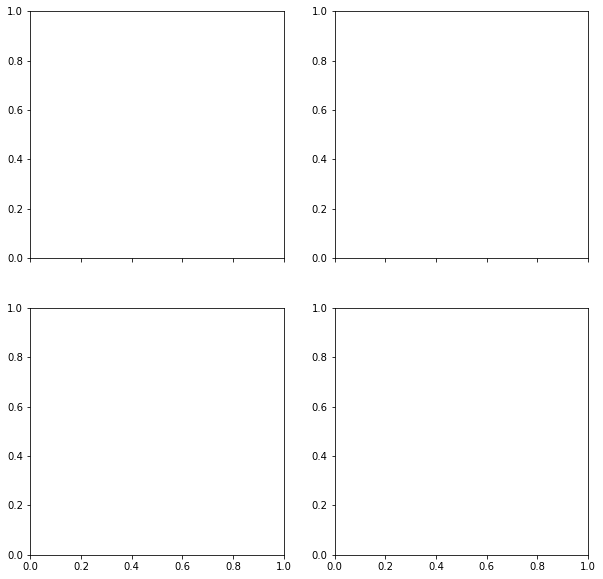

In [71]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(10,10))

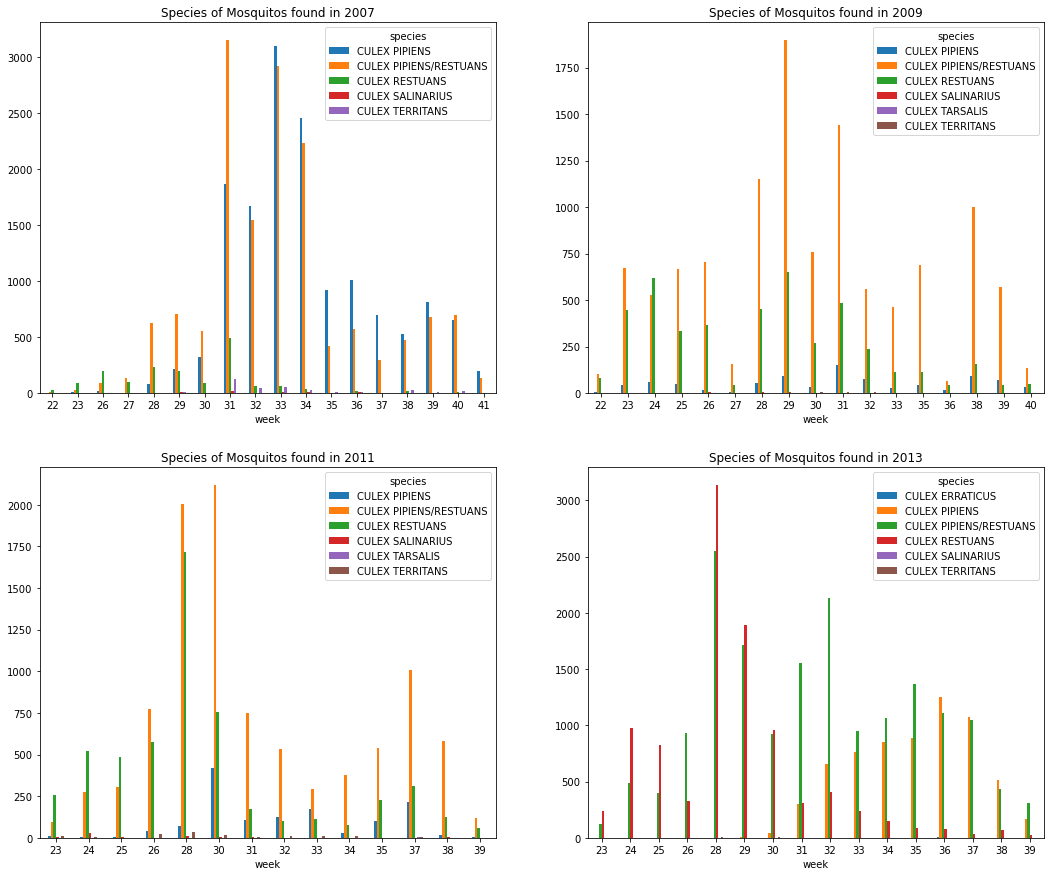

In [103]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18,15))
ax = ax.ravel()

for i, yr in enumerate([2007, 2009, 2011, 2013]):
    weather_train_df[weather_train_df['year'] == yr]\
    .groupby(['week','species'])['nummosquitos'].sum().unstack().fillna(0).plot.bar(ax=ax[i])
    ax[i].set_title(f'Species of Mosquitos found in {yr}')
    ax[i].tick_params(labelrotation = 0);

The number of mosquitos found in 2007 and 2013 is the highest.

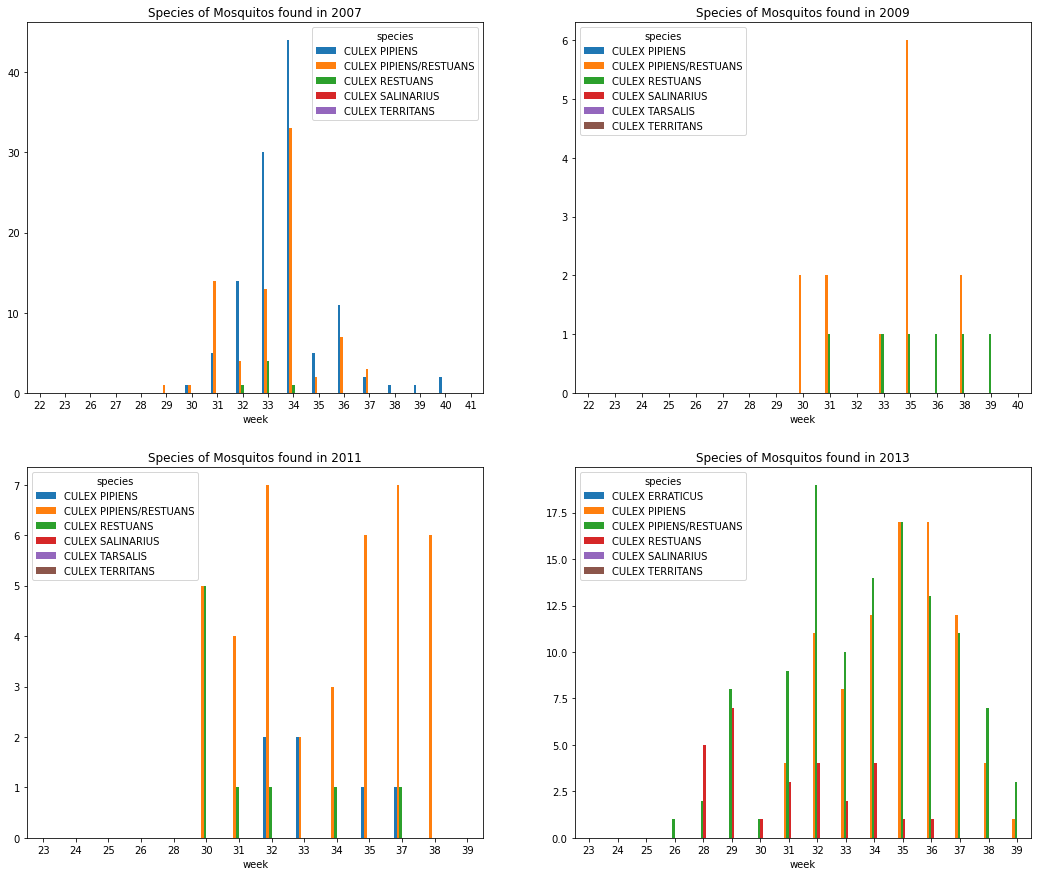

In [104]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18,15))
ax = ax.ravel()

for i, yr in enumerate([2007, 2009, 2011, 2013]):
    weather_train_df[weather_train_df['year'] == yr]\
    .groupby(['week','species'])['wnvpresent'].sum().unstack().fillna(0).plot.bar(ax=ax[i])
    ax[i].set_title(f'Species of Mosquitos found in {yr}')
    ax[i].tick_params(labelrotation = 0);

In [105]:
spray = pd.read_csv('../data/spray_clean.csv')

In [107]:
spray['year'].value_counts()

2013    12626
2011     1668
Name: year, dtype: int64

In [108]:
spray.groupby('date')['year'].value_counts()

date        year
2011-08-29  2011      95
2011-09-07  2011    1573
2013-07-17  2013    2202
2013-07-25  2013    1607
2013-08-08  2013    1195
2013-08-15  2013    2668
2013-08-16  2013     141
2013-08-22  2013    1587
2013-08-29  2013    2302
2013-09-05  2013     924
Name: year, dtype: int64

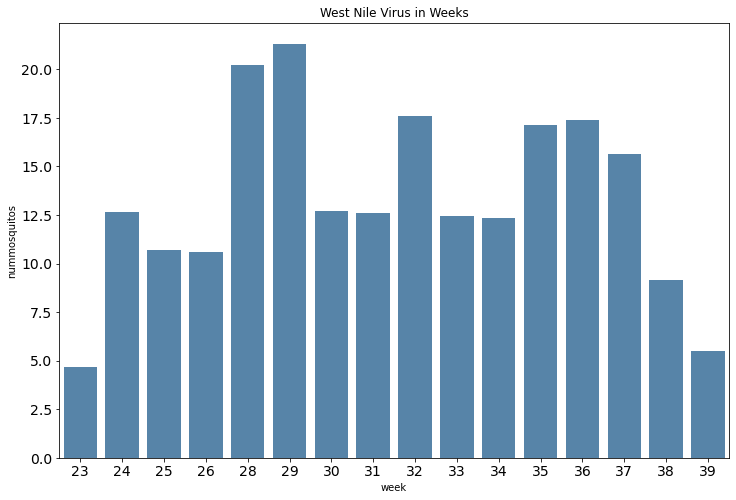

In [133]:
plt.figure(figsize=(12,8))
week_groupby = weather_train_df[weather_train_df['year'] == 2013].groupby(by='week').mean().reset_index()
sns.barplot(data=week_groupby, x='week', y='nummosquitos', color='#4986B6')
plt.tick_params(labelsize=14)
plt.title('West Nile Virus in Weeks');

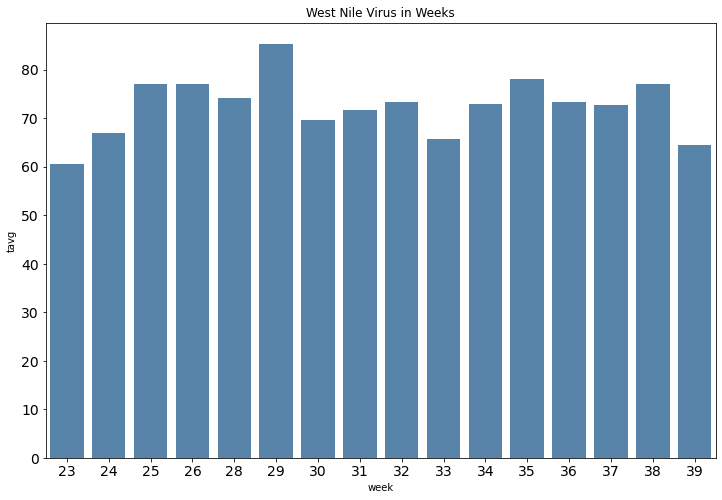

In [132]:
plt.figure(figsize=(12,8))
week_groupby = weather_train_df[weather_train_df['year'] == 2013].groupby(by='week').mean().reset_index()
sns.barplot(data=week_groupby, x='week', y='tavg', color='#4986B6')
plt.tick_params(labelsize=14)
plt.title('West Nile Virus in Weeks');

C:\Users\JAYYJA~1\AppData\Local\Temp/ipykernel_11040/3701038970.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(weather_train_df.corr(), dtype=np.bool)


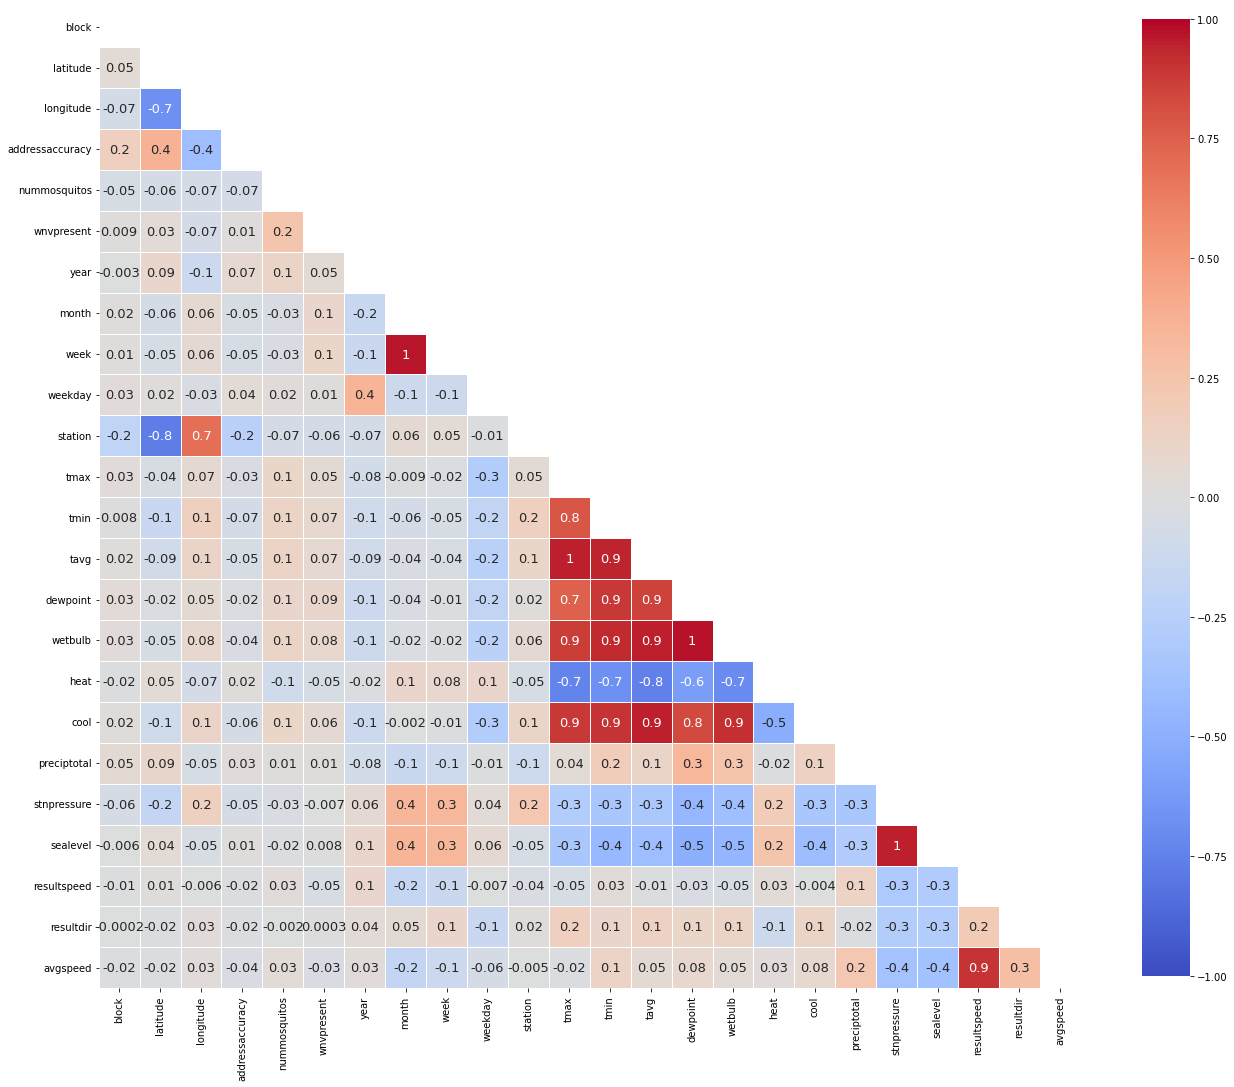

In [137]:
fix, ax = plt.subplots(figsize=(22,22))

mask = np.zeros_like(weather_train_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(weather_train_df.corr(), mask=mask, ax=ax, cmap='coolwarm',vmin=-1, vmax=1,
                 square=True, linewidth=1,annot=True,annot_kws={'size':'13'},
                 cbar_kws={"shrink": 0.8}, fmt='.1g',center=0);

In [138]:
weather_train_df.to_csv('../data/jay_weather_train.csv')

In [26]:
weather_train_df.columns

Index(['date', 'address', 'species', 'block', 'street', 'trap',
       'addressnumberandstreet', 'latitude', 'longitude', 'addressaccuracy',
       'nummosquitos', 'wnvpresent', 'year', 'month', 'week', 'weekday',
       'station', 'tmax', 'tmin', 'tavg', 'dewpoint', 'wetbulb', 'heat',
       'cool', 'sunrise', 'sunset', 'codesum', 'preciptotal', 'stnpressure',
       'sealevel', 'resultspeed', 'resultdir', 'avgspeed'],
      dtype='object')